In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime


from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob


In [3]:
!ls /Data2/SubX/EMC/GEFS/

cape					   sty_sfc
climatology				   swe_sfc
correctedfiles.d			   ta_10
cprat_sfc				   ta_100
DJF					   ta_30
dlwrf_sfc				   ta_50
dswrf_sfc				   tas_2m
forecast				   tasmax_sfc
grb2_databefore1strecord.txt		   tasmin_sfc
grb2_large_int_byte_files.txt		   tdps_sfc
hfls_sfc				   ts_sfc
hfss_sfc				   ua_10
hlcy					   ua_100
huss_850				   ua_10m
JJA					   ua_200
originaltarfiles.d			   ua_30
pentad_climatology			   ua_50
prate_sfc				   ua_850
pr_sfc					   ulwrf_sfc
psl_sfc					   uswrf_sfc
rlut_toa				   va_10
RMM					   va_100
ROMI					   va_10m
sic_sfc					   va_200
snc_sfc					   va_30
snod_sfc				   va_50
soilw1_sfc				   va_850
soilw2_sfc				   wap_500
soilw3_sfc				   zg_10
soilw4_sfc				   zg_200
SON					   zg_30
sorted_grb2_EMC_GEFS_prob_files_final.txt  zg_50
sorted_grb2_prob_files.txt		   zg_500
sort_grb2_large_int_byte_files.txt	   zg_850
stx_sfc


In [4]:
!ls /Data2/SubX/EMC/GEFS/tdps_sfc/


1999  2001  2003  2005	2007  2009  2011  2013	2015
2000  2002  2004  2006	2008  2010  2012  2014	2016


In [5]:
!ls /Data2/SubX/EMC/GEFS/tdps_sfc/1999

01  02	03  04	05  06	07  08	09  10	11  12


In [6]:
#!ls /Data2/SubX/EMC/GEFS/tdps_sfc/1999/01

# This is my preprocessing function, which I run on each grib file

In [7]:
# def ppf2_filename(ds,filename):
#     # rename coordinates
#     ds  = ds.rename({ 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'L'})
#     # getting start time from file name
#     ts = filename.split('_')
#     whereGEFS = ts.index('GEFS')
#     dateSstr = ts[whereGEFS+1]
#     dateS = datetime.strptime(dateSstr, '%d%b%Y')
#     ds.coords['S'] = 'S', np.atleast_1d(dateS)
    
#     # replacing L dates with integer (lead days)
#     # so that I can reduce to a fixed size
#     # BEWARE - this is a hardcoded step now, so it needs to be checked for each model
    
#     #if you comment in the two print lines, you will see how L is read by xarray from the grib file
# #     print(ds.L)
# #     print(ds.S)
#     ds.coords['L']=np.arange(0.5,35.5)

#     # select US
#     ds = ds.sel(lat=slice(42,32),lon=slice(-103+360,-90+360))
# #     print(ds)
#     return ds

L in this files is read by xarray like this

`<xarray.DataArray 'L' (L: 35)>
array([  3600000000000,   7200000000000,  10800000000000,  14400000000000,
        18000000000000,  21600000000000,  25200000000000,  28800000000000,
        32400000000000,  36000000000000,  39600000000000,  43200000000000,
        46800000000000,  50400000000000,  54000000000000,  57600000000000,
        61200000000000,  64800000000000,  68400000000000,  72000000000000,
        75600000000000,  79200000000000,  82800000000000,  86400000000000,
        90000000000000,  93600000000000,  97200000000000, 100800000000000,
       104400000000000, 108000000000000, 111600000000000, 115200000000000,
       118800000000000, 122400000000000, 126000000000000],
      dtype='timedelta64[ns]')`

however if I use wgrib2 on one file
`!wgrib2 -v /Data2/SubX/EMC/GEFS/cape/1999/06/cape_GEFS_02jun1999_00z_d01_d35_m00.grb2 `

I get something like

` 1:0:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:1 day fcst:ENS=low-res ctl
2:46954:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:2 day fcst:ENS=low-res ctl
3:92924:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:3 day fcst:ENS=low-res ctl
4:139690:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:4 day fcst:ENS=low-res ctl
5:186582:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:5 day fcst:ENS=low-res ctl `

Let's make sure I am correctly overwriting L.

I am now using L=array([  43200000000000,  129600000000000,  216000000000000,
        302400000000000,  388800000000000,  475200000000000,
        561600000000000,  648000000000000,  734400000000000,
        820800000000000,  907200000000000,  993600000000000,
       1080000000000000, 1166400000000000, 1252800000000000,
       1339200000000000, 1425600000000000, 1512000000000000,
       1598400000000000, 1684800000000000, 1771200000000000,
       1857600000000000, 1944000000000000, 2030400000000000,
       2116800000000000, 2203200000000000, 2289600000000000,
       2376000000000000, 2462400000000000, 2548800000000000,
       2635200000000000, 2721600000000000, 2808000000000000,
       2894400000000000, 2980800000000000, 3067200000000000,
       3153600000000000, 3240000000000000, 3326400000000000,
       3412800000000000, 3499200000000000, 3585600000000000,
       3672000000000000, 3758400000000000, 3844800000000000], etc......
      dtype='timedelta64[ns]')
      
from the other models I loaded 

# Load, preprocess, append, and concatenate all the grib files. In this notebook I ran it on half of the data available.

### I will comment the code below for pr_sfc. I repeat the code for each variable separiately. I could loop it for a list of varname =[ 'pr_sfc' , ....] but I preferred keeping it separate.

In [8]:
# def ppf2_filename(ds,filename):
#     # rename coordinates
#     ds  = ds.rename({ 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'time'})
#     # getting start time from file name
#     ts = filename.split('_')
#     print(ts)
#     whereGEFS = ts.index('GEFS')
#     dateSstr = ts[whereGEFS+1]
#     dateS = datetime.strptime(dateSstr, '%d%b%Y')
    
#     Mvalue = np.int(float(np.asarray(ts[-1][2:4])))

#     ds.coords['S'] = 'S', np.atleast_1d(dateS)
#     ds.coords['M'] = 'M', np.atleast_1d(Mvalue)
    
#     # replacing L dates with integer (lead days)
#     # so that I can reduce to a fixed size
#     # BEWARE - this is a hardcoded step now, so it needs to be checked for each model
    
#     #if you comment in the two print lines, you will see how L is read by xarray from the grib file
# #     print(ds.L)
# #     print(ds.S)
#     ds.coords['time']=np.array([  43200000000000,  129600000000000,  216000000000000,
#         302400000000000,  388800000000000,  475200000000000,
#         561600000000000,  648000000000000,  734400000000000,
#         820800000000000,  907200000000000,  993600000000000,
#        1080000000000000, 1166400000000000, 1252800000000000,
#        1339200000000000, 1425600000000000, 1512000000000000,
#        1598400000000000, 1684800000000000, 1771200000000000,
#        1857600000000000, 1944000000000000, 2030400000000000,
#        2116800000000000, 2203200000000000, 2289600000000000,
#        2376000000000000, 2462400000000000, 2548800000000000,
#        2635200000000000, 2721600000000000, 2808000000000000,
#        2894400000000000, 2980800000000000],
#       dtype='timedelta64[ns]')

#     # select US
#     ds = ds.sel(lat=slice(23,50), lon=slice(230,300))
# #     print(ds)
#     return ds

In [9]:
# ds = xr.open_dataset('/Data2/SubX/EMC/GEFS/cape/1999/01/cape_GEFS_06jan1999_00z_d01_d35_m00.grb2',
#                 engine='pynio')
# ds = ppf2_filename(ds,'/Data2/SubX/EMC/GEFS/cape/1999/01/cape_GEFS_06jan1999_00z_d01_d35_m00.grb2')
# ds

In [10]:
#!ls /Data2/SubX/EMC/GEFS/cape/1999/11

In [ ]:
from glob import glob
variable_names = ['pr_sfc']
def ppf2_filename(ds,filename):
    # rename coordinates
    ds  = ds.rename({ 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'time'})
    # getting start time from file name
    ts = filename.split('_')
#     print(ts)
    whereGEFS = ts.index('GEFS')
    dateSstr = ts[whereGEFS+1]
    dateS = datetime.strptime(dateSstr, '%d%b%Y')
    
    Mvalue = np.int(float(np.asarray(ts[-1][2:4])))

    ds.coords['S'] = 'S', np.atleast_1d(dateS)
    ds.coords['M'] = 'M', np.atleast_1d(Mvalue)
    
    ds.coords['time']=np.array([  43200000000000,  129600000000000,  216000000000000,
        302400000000000,  388800000000000,  475200000000000,
        561600000000000,  648000000000000,  734400000000000,
        820800000000000,  907200000000000,  993600000000000,
       1080000000000000, 1166400000000000, 1252800000000000,
       1339200000000000, 1425600000000000, 1512000000000000,
       1598400000000000, 1684800000000000, 1771200000000000,
       1857600000000000, 1944000000000000, 2030400000000000,
       2116800000000000, 2203200000000000, 2289600000000000,
       2376000000000000, 2462400000000000, 2548800000000000,
       2635200000000000, 2721600000000000, 2808000000000000,
       2894400000000000, 2980800000000000],
      dtype='timedelta64[ns]')

    # select US
    ds = ds.sel(lat=slice(50,23), lon=slice(230,300))
#     print(ds)
    return ds

def read_netcdfs(files, dim, transform_func=None):
    def process_one_path(path):
        # use a context manager, to ensure the file gets closed after use
#         print(path)
        with xr.open_dataset(path, engine='pynio', chunks={}) as ds:
            # transform_func should do some sort of selection or
            # aggregation
            if transform_func is not None:
                ds = transform_func(ds, path)
            # load all data from the transformed dataset, to ensure we can
            # use it after closing each original file
#             print(ds)
#             ds.load()
            return ds
#     print(files)
    paths = sorted(glob(files))
#     print(paths)
    datasets = [process_one_path(p) for p in paths]
    
    combined = xr.combine_by_coords(datasets)
    combined = combined.chunk({'S':4,'M':-1})
    return combined

var_l=[]
for ivx, ivar in enumerate(variable_names):
    print(ivar)
    if ivar in os.listdir('/Data2/SubX/EMC/GEFS/'):
        c_l = []
        for iy in np.arange(1999, 2017):#2017
            print(iy)
            # here we suppose we only care about the combined mean of each file;
            # you might also use indexing operations like .sel to subset datasets
            combined = read_netcdfs('/Data2/SubX/EMC/GEFS/'+ivar+'/'+np.str(iy)+'/*/*.grb2', dim=['S','M'],
                                    transform_func=ppf2_filename)
            
            c_l.append(combined)
    all_values = xr.concat(c_l, dim='S') 
    var_l.append(all_values)
all_variables = xr.merge(var_l)

pr_sfc
1999


In [ ]:
all_variables

In [ ]:
all_variables = all_variables.rename({'APCP_P1_L1_GLL0':'pr_sfc'})

In [ ]:
all_variables

In [ ]:
all_variables.load()

In [106]:
binv = np.arange(0,33,3)
binv[-1]+=1
climatology_85 = []
# I do this month by month, I could use the dayofyear attributes and eliminate this loop
for k, gp in all_variables.groupby('S.month'):
    # I select the 3day or week2 values
    for accu_value in (['8-10','10-12','12-14','8-14']):
        # isel slice is not inclusive of the last value
        gp1 = gp.isel(time=slice(np.int(accu_value.split('-')[0]), np.int(accu_value.split('-')[1])+1))
        # I group by 3 day bins, since the start date varies almost each year (or 4.5 times out of 6 years)
        for k2, gp2, in gp1.groupby_bins('S.day', bins=binv):
            #stack because I want to pool all data
            gp3 = gp2.stack(MSt=('M','S','time'))
            gp4 = gp3.quantile(dim=['MSt'], q=[0.15,0.33,0.5,0.667,0.85])
            #add extra dimensions
            gp4 = gp4.expand_dims(['S_start','accu_value'])
            # create string for the S, I will use year=1900 because I care about day/month only
            day_init = k2.left
            if day_init==0:
                day_init+=1
            string_date = '1900-'+np.str(gp2.S.dt.month[0].values).zfill(2)+'-'+np.str(day_init).zfill(2)
            nnn = np.datetime64(string_date)
            gp4.coords['S_start'] =  'S_start', np.atleast_1d(pd.DatetimeIndex([nnn]))
            gp4.coords['accu_value'] = 'accu_value',np.atleast_1d(accu_value)
            climatology_85.append(gp4)
all_clim = xr.combine_by_coords(climatology_85)            

In [107]:
all_clim = xr.combine_by_coords(climatology_85)

In [108]:
all_clim

<xarray.Dataset>
Dimensions:     (S_start: 120, accu_value: 4, lat: 28, lon: 71, quantile: 5)
Coordinates:
  * lat         (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * quantile    (quantile) float64 0.15 0.33 0.5 0.667 0.85
  * S_start     (S_start) datetime64[ns] 1900-01-01 1900-01-03 ... 1900-12-27
  * lon         (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * accu_value  (accu_value) object '10-12' '12-14' '8-10' '8-14'
Data variables:
    pr_sfc      (S_start, accu_value, quantile, lat, lon) float64 0.0 ... 4.9

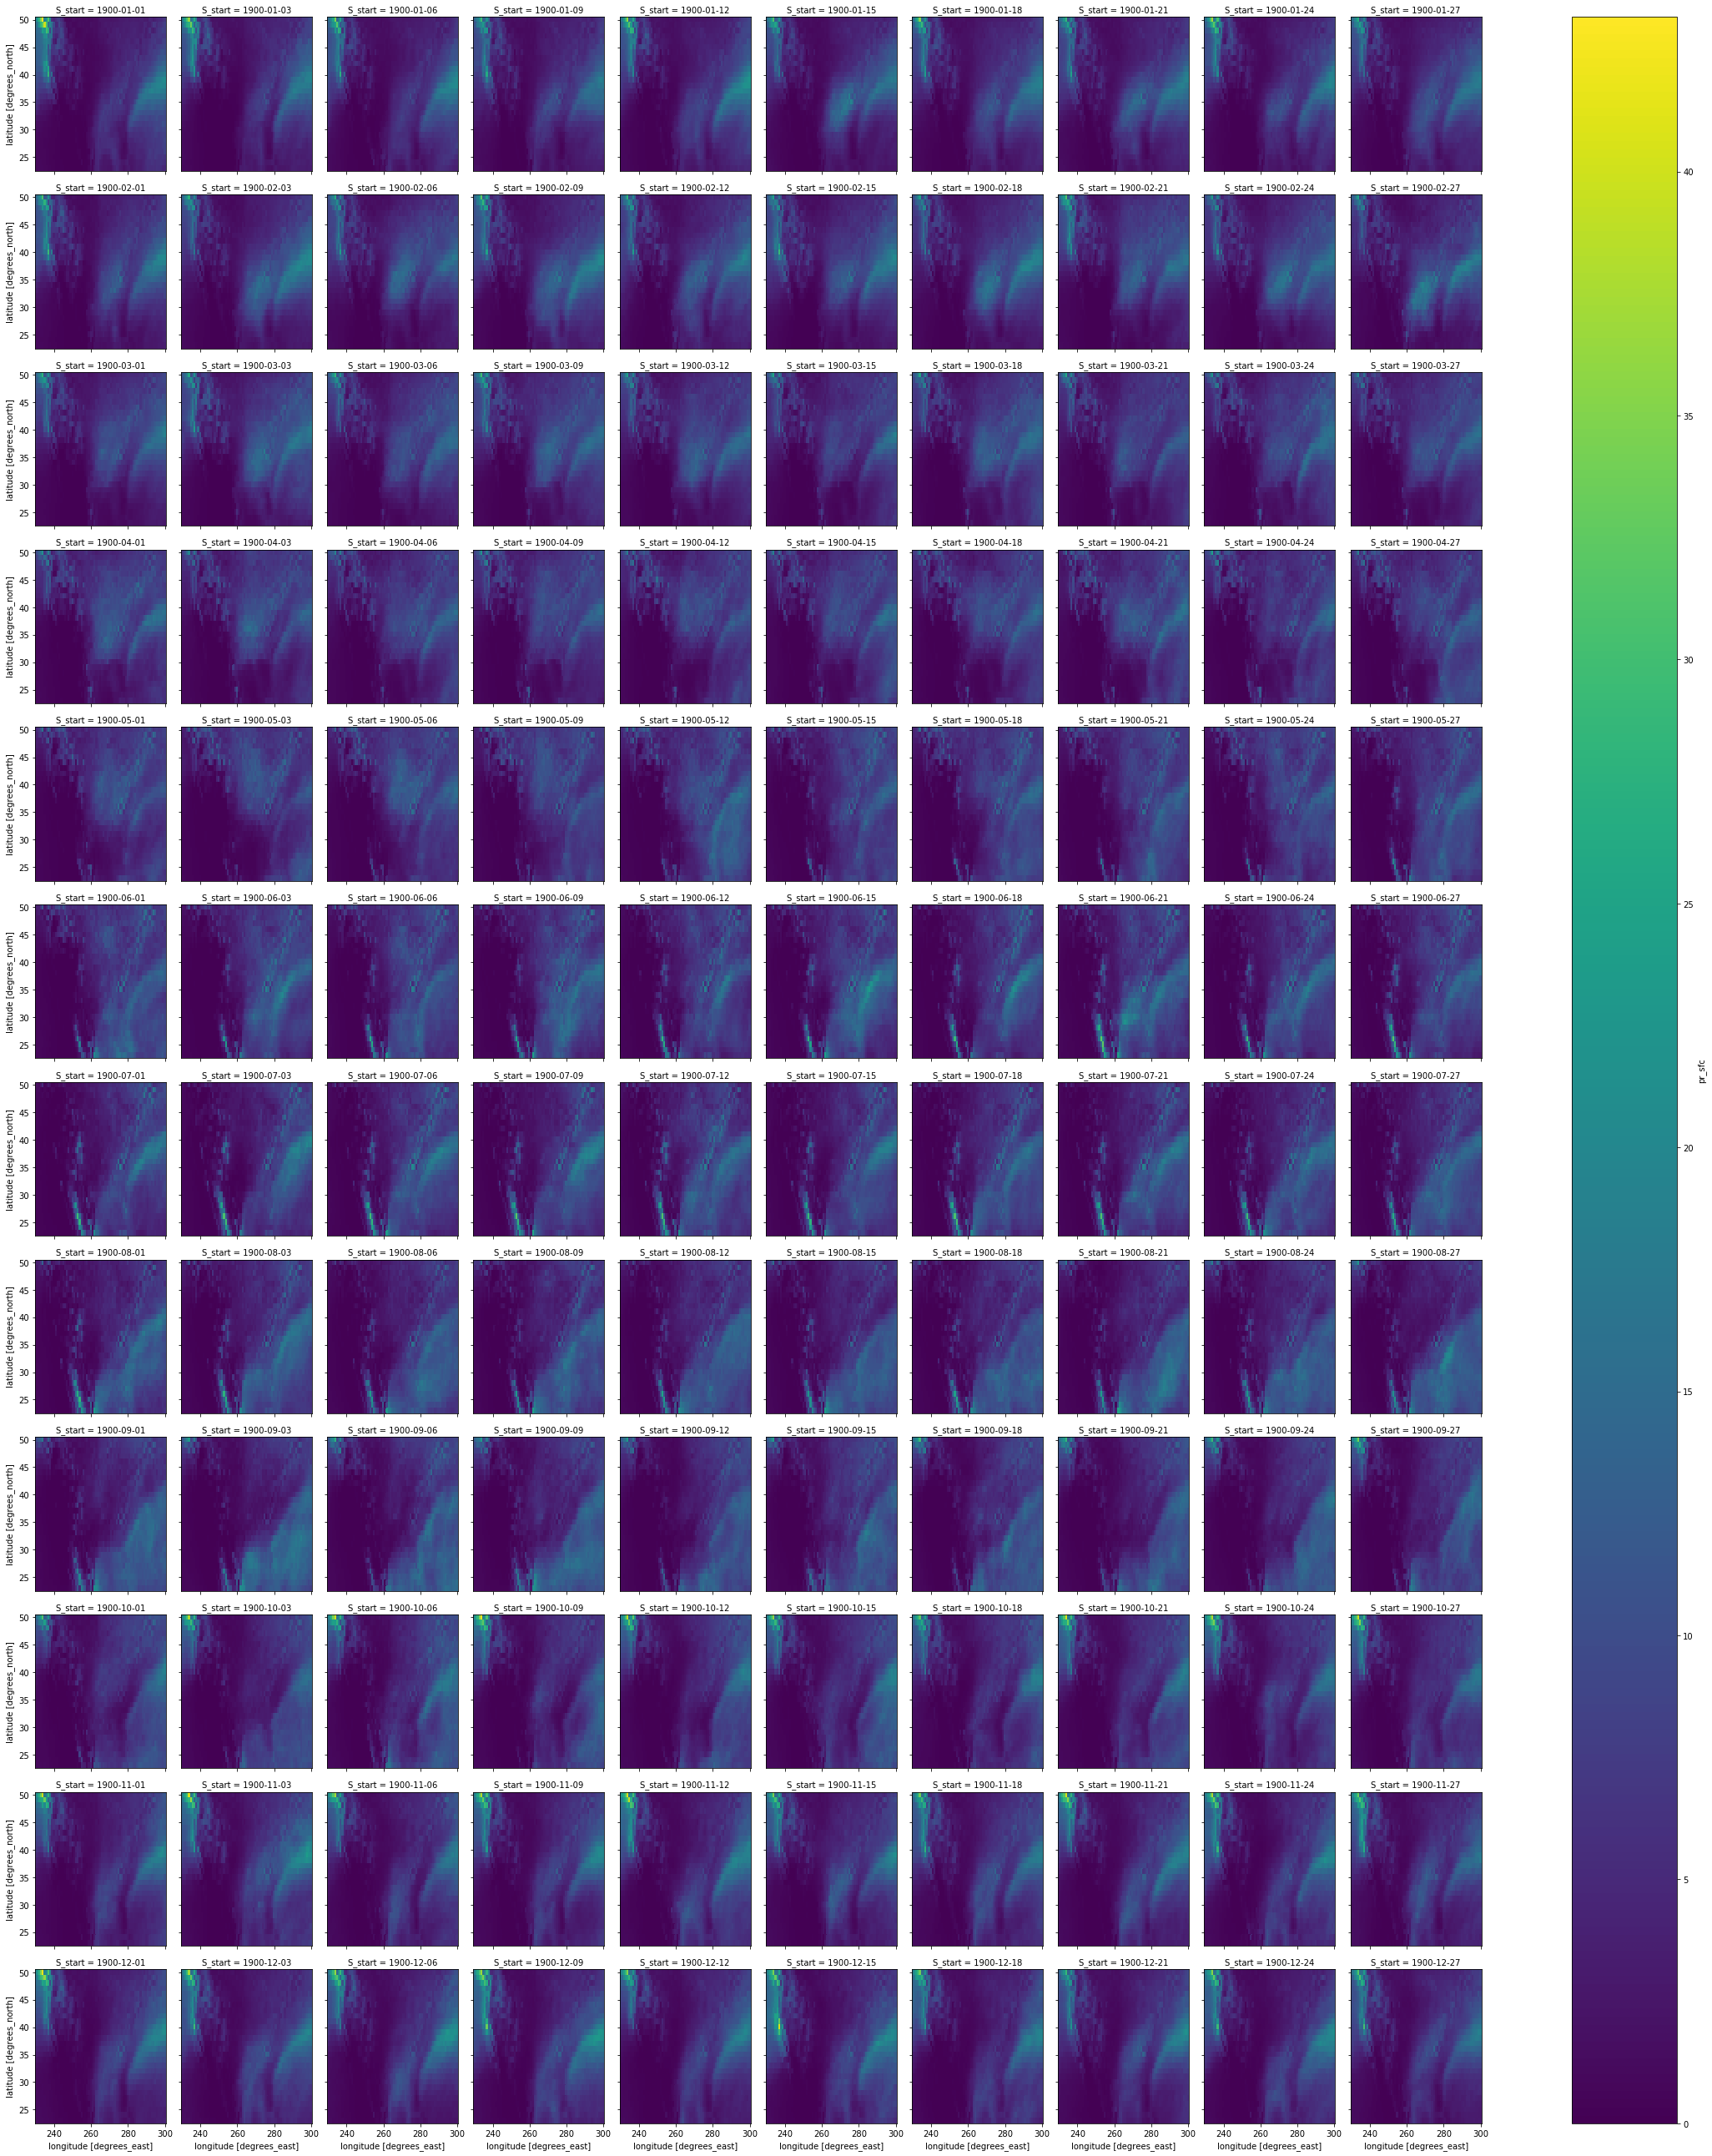

In [93]:
all_clim.pr_sfc.plot(col='S_start', col_wrap=10,)

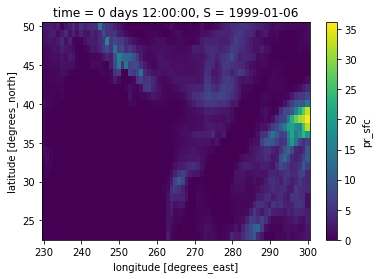

In [139]:
all_variables.pr_sfc[0,:,0].mean('M').plot()

In [16]:
#all_variables  = all_variables.chunk({'S':200})

In [399]:
# from dask.distributed import Client, LocalCluster

# cluster = LocalCluster()
# client = Client(cluster)
# cluster

In [400]:
#client.restart()

# MASK

In [20]:
MASK_url = 'http://iridl.ldeo.columbia.edu/expert/SOURCES/.Models/.SubX/'
MASK_url1 = '/.hindcast/.pr'
MASK_url2 = '/dup/.SOURCES/.Features/.Political/.World/.Countries/.the_geom/objectid/135/VALUE/rasterize/dods'
url3 = '/Y/(23N)/(50N)/RANGEEDGES/X/(130W)/(60W)/RANGEEDGES'  


In [27]:
#[#'ESRL/.FIMr1p1',
               #'CESM/.30LCESM1', 'CESM/.46LCESM1',
               #'ECCC/.GEM','ECCC/.GEPS5','ECCC/.GEPS6',
i_v_u ='EMC/.GEFS'
#                'GMAO/.GEOS_V2p1',
#                'NRL/.NESM',
#                'RSMAS/.CCSM4',
#                'NCEP/.CFSv2'
              #]

ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3+MASK_url2)
ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)


In [28]:
ds_mask = ds_mask.rename({'X':'lon', 'Y':'lat'})
ds_mask = ds_mask.isel(objectid=0, drop=True)
ds_mask.coords['lon'] = ds_mask.lon+360.

In [29]:
ds_mask


<xarray.Dataset>
Dimensions:   (lat: 28, lon: 71)
Coordinates:
  * lat       (lat) float32 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon       (lon) float32 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
Data variables:
    the_geom  (lat, lon) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    Conventions:  IRIDL

In [30]:
all_variables

<xarray.Dataset>
Dimensions:  (M: 10, S: 313, lat: 28, lon: 71, time: 35)
Coordinates:
  * time     (time) timedelta64[ns] 0 days 12:00:00 ... 34 days 12:00:00
  * M        (M) int64 0 1 2 3 4 5 6 7 8 9
  * lat      (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 27.0 26.0 25.0 24.0 23.0
  * lon      (lon) float32 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2004-12-22 2004-12-29
Data variables:
    cape     (S, M, time, lat, lon) float32 2.0 4.0 7.0 2.0 ... 13.0 13.0 14.0
    tas_2m   (S, M, time, lat, lon) float32 281.35 281.5 ... 295.75998 295.79
    tdps_2m  (S, M, time, lat, lon) float32 279.97998 280.03 ... 289.83
    wap_500  (S, M, time, lat, lon) float32 -0.12228203 ... 0.119137496
    pr_sfc   (S, M, time, lat, lon) float32 1.1 1.2 1.0 ... 0.53 0.53999996

In [34]:
all_variables_m= all_variables.where(ds_mask.the_geom>0)

In [35]:
all_variables_m

<xarray.Dataset>
Dimensions:  (M: 10, S: 313, lat: 28, lon: 71, time: 35)
Coordinates:
  * lat      (lat) float64 50.0 49.0 48.0 47.0 46.0 ... 27.0 26.0 25.0 24.0 23.0
  * time     (time) timedelta64[ns] 0 days 12:00:00 ... 34 days 12:00:00
  * M        (M) int64 0 1 2 3 4 5 6 7 8 9
  * lon      (lon) float32 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2004-12-22 2004-12-29
Data variables:
    cape     (S, M, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tas_2m   (S, M, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tdps_2m  (S, M, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    wap_500  (S, M, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    pr_sfc   (S, M, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan

/local/ERAin/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


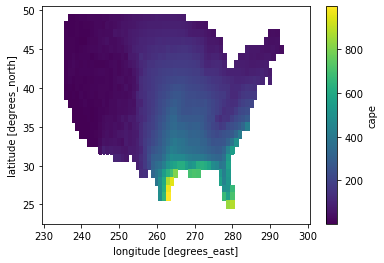

In [36]:
all_variables_m.cape.mean(dim=['S','M','time']).plot()

# Calculate Quantiles

In [140]:
def calculate_p_x_plot_Bstep(ds_week, var1, var2, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99], binsize=2.):
    '''
    var1 will be the precip
    var2 will be x'''
    
#     print(binsize)
    step = binsize*1.
    to_bin = lambda x: np.round(x / step) * step
    ds_week["binvar"] = to_bin(ds_week[var2])
    
    grouped = ds_week[[var1, 'binvar']].groupby('binvar')
    
    ds_out = grouped.max()
#     print(ds_out)
    ds_out.coords['quantiles'] = np.array(q)
    ds_out = ds_out.drop(var1)
    arr = [np.nanpercentile(gp[var1].values, q) 
           if gp[var1].shape[0]>100 else np.zeros_like(q) for iim, (k, gp) in enumerate(grouped) ]

    ds_out['pr_q_'+var2] = (('binvar','quantiles'), np.array(arr) )
    ds_out = ds_out.rename({'binvar':var2+'b'})
    return ds_out

def calculate_p_x_plot_Astep(dsIN, variables_to_compare, Lvalues, S_choice, binsize=0.5):
    '''Lvalues = position numbers, so something like np.arange(0,7)
       ds = dataset
       variables_to_compare = list of variables names, the first one needs to be Precip (or the Y variable)
    '''
    week = dsIN.isel(time=Lvalues)
    weekM = dsIN.isel(time=Lvalues)
    
    # data needs to have these coordinates
    week = week.stack(MSll=('M','S','lat','lon','time'))
    weekM = weekM.mean('M').stack(MSll=('S','lat','lon','time'))
    
    week.coords['MSll'] = np.arange(0,week.MSll.shape[0]) 
    weekM.coords['MSll'] = np.arange(0,weekM.MSll.shape[0]) 
    
    if binsize.shape[0]>1:
        if binsize.shape[0]==len(variables_to_compare[1:]):
            flagbin = 1
        else:
            'ERROR binsize can be either a scaler or an array as long as the number of X variables'
            return
    else:
        flagbin=0
    
    results = []
    for iM, ds_case in enumerate([week, weekM]):
        for iv, ivar in enumerate(variables_to_compare[1:]):
            if flagbin==1:
                binsizeU = binsize[iv]
            else:
                binsizeU = binsize*1.
                
            print(ivar)
            if iv ==0:
                ds_group = calculate_p_x_plot_Bstep(week, variables_to_compare[0], ivar, binsize=binsizeU)
            else:
                ds_temp = calculate_p_x_plot_Bstep(week, variables_to_compare[0], ivar, binsize=binsizeU)
                ds_group = xr.merge([ds_group, ds_temp] )
                del ds_temp

        if S_choice == 'all':
            ds_group.coords['S'] = 'all'
            ds_group = ds_group.expand_dims(['S'])
        else:
            ds_group.coords['S'] = S_choice
            ds_group = ds_group.expand_dims(['S'])
        
        if iM==1:
            for ih in ds_group.data_vars:
                ds_group=ds_group.rename({ih:ih+'_M'})
                
        results.append(ds_group)
    results = xr.merge(results)
    return results





In [141]:
qvalues = [33, 50, 66, 75,85,95,99,99.5,99.9,99.95,99.99]

In [142]:
sub_all = all_variables.isel(S=np.arange(0,300))

In [143]:
sub_all

<xarray.Dataset>
Dimensions:  (M: 10, S: 300, lat: 28, lon: 71, time: 35)
Coordinates:
  * time     (time) timedelta64[ns] 0 days 12:00:00 ... 34 days 12:00:00
  * M        (M) int64 0 1 2 3 4 5 6 7 8 9
  * lat      (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 27.0 26.0 25.0 24.0 23.0
  * lon      (lon) float32 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2004-09-22 2004-09-29
Data variables:
    cape     (S, M, time, lat, lon) float32 2.0 4.0 7.0 2.0 ... 13.0 18.0 22.0
    tas_2m   (S, M, time, lat, lon) float32 281.35 281.5 ... 299.22 299.13998
    tdps_2m  (S, M, time, lat, lon) float32 279.97998 280.03 ... 292.7 292.7
    wap_500  (S, M, time, lat, lon) float32 -0.12228203 ... 0.05484961
    pr_sfc   (S, M, time, lat, lon) float32 1.1 1.2 1.0 1.0 ... 0.0 0.0 0.2 0.3

In [144]:
sub_all['logcape']=np.log(sub_all.cape)
sub_all['logwap_plus']=np.log(sub_all.wap_500.where(sub_all.wap_500>=0))
sub_all['logwap_minus']=np.log(-sub_all.wap_500.where(sub_all.wap_500<0))
sub_all['logwap_plus']  = xr.where(sub_all.logwap_plus==-np.inf,0,sub_all.logwap_plus)

In [147]:
S_choice =='all'
hist_all_S_03 = calculate_p_x_plot_Astep(sub_all,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape', 
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(0,4), S_choice, binsize=np.array([0.5,0.5,0.1,1,1]))
hist_all_S_36 = calculate_p_x_plot_Astep(sub_all,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape', 
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(3,7), S_choice, binsize=np.array([0.5,0.5,0.1,1,1]))
hist_all_S_68 = calculate_p_x_plot_Astep(sub_all,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape', 
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(6,9), S_choice, binsize=np.array([0.5,0.5,0.1,1,1]))
hist_all_S_810 = calculate_p_x_plot_Astep(sub_all,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape', 
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(8,11), S_choice, binsize=np.array([0.5,0.5,0.1,1,1]))
hist_all_S_1012 = calculate_p_x_plot_Astep(sub_all,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape', 
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(10,13), S_choice, binsize=np.array([0.5,0.5,0.1,1,1]))
hist_all_S_1214 = calculate_p_x_plot_Astep(sub_all,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape', 
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(12,15), S_choice, binsize=np.array([0.5,0.5,0.1,1,1]))

/local/ERAin/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus


In [149]:
hist_monthly_S_ls_03 = []
hist_monthly_S_ls_36 = []
hist_monthly_S_ls_68 = []
hist_monthly_S_ls_810 = []
hist_monthly_S_ls_1012 = []
hist_monthly_S_ls_1214 = []
for k, gp in sub_all.groupby('S.month'):
    print(k)
    temp_hist = calculate_p_x_plot_Astep(gp,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape',  
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(0,4), k, binsize=np.array([0.5,0.5,0.1,1,1]))
    hist_monthly_S_ls_03.append(temp_hist)
    temp_hist = calculate_p_x_plot_Astep(gp,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape',  
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(3,7), k, binsize=np.array([0.5,0.5,0.1,1,1]))
    hist_monthly_S_ls_36.append(temp_hist)
    temp_hist = calculate_p_x_plot_Astep(gp,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape',  
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(6,9), k, binsize=np.array([0.5,0.5,0.1,1,1]))
    hist_monthly_S_ls_68.append(temp_hist)
    temp_hist = calculate_p_x_plot_Astep(gp,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape',  
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(8,11), k, binsize=np.array([0.5,0.5,0.1,1,1]))
    hist_monthly_S_ls_810.append(temp_hist)
    temp_hist = calculate_p_x_plot_Astep(gp,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape',  
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(10,13), k, binsize=np.array([0.5,0.5,0.1,1,1]))
    hist_monthly_S_ls_1012.append(temp_hist)
    temp_hist = calculate_p_x_plot_Astep(gp,['pr_sfc', 'tas_2m', 'tdps_2m', 'logcape',  
                                               'logwap_plus','logwap_minus'] ,
                                      np.arange(12,15), k, binsize=np.array([0.5,0.5,0.1,1,1]))
    hist_monthly_S_ls_1214.append(temp_hist)
            
            
            
            

1
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
2
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
logwap_minus
tas_2m
tdps_2m
logcape
logwap_plus
l

In [ ]:

# for S_choice in ['all','months']:
#     if S_choice =='all':
#         hist_all_S = calculate_p_x_plot_Astep(sub_all,['pr_sfc',  
#                                                        'logwap_plus','logwap_minus'] ,
#                                               np.arange(0,8), S_choice, binsize=np.array([1,1]))
    
#     else:
#         hist_monthly_S_ls = []
#         for k, gp in sub_all.groupby('S.month'):
#             print(k)
#             temp_hist = calculate_p_x_plot_Astep(gp,['pr_sfc', 
#                                                        'logwap_plus','logwap_minus'] ,
#                                               np.arange(0,8), k, binsize=np.array([1,1]))

#             hist_monthly_S_ls.append(temp_hist)
            
            
            
            

In [126]:
hist_all_S

<xarray.Dataset>
Dimensions:              (S: 1, logwap_minusb: 18, logwap_plusb: 17, quantiles: 9)
Coordinates:
  * logwap_plusb         (logwap_plusb) float64 -15.0 -14.0 -13.0 ... -0.0 1.0
  * quantiles            (quantiles) float64 75.0 85.0 95.0 ... 99.9 99.95 99.99
  * logwap_minusb        (logwap_minusb) float64 -15.0 -14.0 -13.0 ... 1.0 2.0
  * S                    (S) <U3 'all'
Data variables:
    pr_q_logwap_plus     (S, logwap_plusb, quantiles) float64 0.0 0.0 ... 56.31
    pr_q_logwap_minus    (S, logwap_minusb, quantiles) float64 1.0 2.505 ... 0.0
    pr_q_logwap_plus_M   (S, logwap_plusb, quantiles) float64 0.0 0.0 ... 56.31
    pr_q_logwap_minus_M  (S, logwap_minusb, quantiles) float64 1.0 2.505 ... 0.0

In [127]:
hist_all_S = hist_all_S.isel(S=0, drop=True)

In [128]:
hist_monthly_S_ls = [ih.isel(S=0, drop=True) for ih in hist_monthly_S_ls]

/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


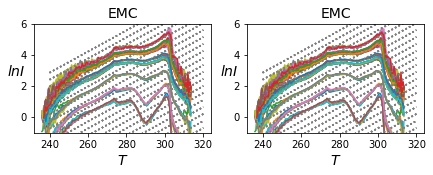

In [152]:
plt.figure(figsize=(7,2))
for hist_all_S in [hist_all_S_03, hist_all_S_36, hist_all_S_68, hist_all_S_810, hist_all_S_1012, hist_all_S_1214]:
    hist_all_S = hist_all_S.isel(S=0, drop=True)
    ax1 = plt.subplot(121)
    plt.plot(hist_all_S.tas_2mb,np.log(hist_all_S.pr_q_tas_2m),'-')
    ax2= plt.subplot(122)
    plt.plot(hist_all_S.tas_2mb,np.log(hist_all_S.pr_q_tas_2m_M),'-')
    for ax in [ax1, ax2]:
        for iim in np.arange(-31,-13,0.45):
            ax.plot(np.array([240,320]),iim+0.068*np.array([240,320]),':', color='grey')
        ax.set_title('EMC', fontsize=14)
        ax.set_ylim((-1,6))
    #     ax.set_xlim((284,305))
        # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
        ax.set_xlabel(r'$T$', fontsize=14)
        ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)

/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


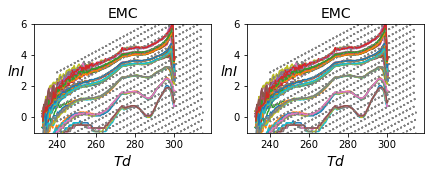

In [154]:
plt.figure(figsize=(7,2))
for hist_all_S in [hist_all_S_03, hist_all_S_36, hist_all_S_68, hist_all_S_810, hist_all_S_1012, hist_all_S_1214]:
    hist_all_S = hist_all_S.isel(S=0, drop=True)
    ax1 = plt.subplot(121)
    plt.plot(hist_all_S.tdps_2mb,np.log(hist_all_S.pr_q_tdps_2m),'-')
    ax2 = plt.subplot(122)
    plt.plot(hist_all_S.tdps_2mb,np.log(hist_all_S.pr_q_tdps_2m_M),'-')
    for ax in [ax1, ax2]:
        for iim in np.arange(-31,-13,0.45):
            ax.plot(np.array([240,315]),iim+0.068*np.array([240,315]),':', color='grey')
        ax.set_title('EMC', fontsize=14)
        ax.set_ylim((-1,6))
    #     ax.set_xlim((284,305))
        # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
        ax.set_xlabel(r'$Td$', fontsize=14)
        ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)


/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


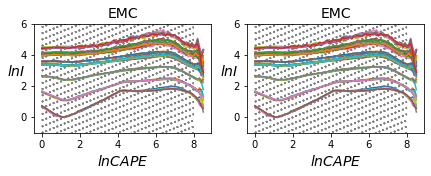

In [156]:
plt.figure(figsize=(7,2))
for hist_all_S in [hist_all_S_03, hist_all_S_36, hist_all_S_68, hist_all_S_810, hist_all_S_1012, hist_all_S_1214]:
    hist_all_S = hist_all_S.isel(S=0, drop=True)
    ax1 = plt.subplot(121)
    plt.plot(hist_all_S.logcapeb,np.log(hist_all_S.pr_q_logcape),'-')
    ax2 = plt.subplot(122)
    plt.plot(hist_all_S.logcapeb,np.log(hist_all_S.pr_q_logcape_M),'-')
    for ax in [ax1, ax2]:
        for iim in np.arange(-5,6,0.4):
            ax.plot(np.array([0,8]),iim+0.5*np.array([0,8]),':', color='grey')
        ax.set_title('EMC', fontsize=14)
        ax.set_ylim((-1,6))
    #     ax.set_xlim((284,305))
        # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
        ax.set_xlabel(r'$lnCAPE$', fontsize=14)
        ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)


/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


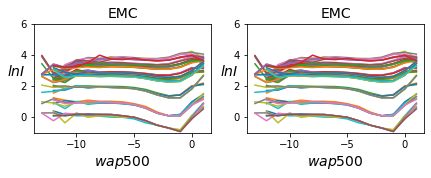

In [158]:
plt.figure(figsize=(7,2))
for hist_all_S in [hist_all_S_03, hist_all_S_36, hist_all_S_68, hist_all_S_810, hist_all_S_1012, hist_all_S_1214]:
    hist_all_S = hist_all_S.isel(S=0, drop=True)
    ax1 = plt.subplot(121)
    ax1.plot(hist_all_S.logwap_plusb,np.log(hist_all_S.pr_q_logwap_plus),'-')

    ax2 = plt.subplot(122)
    ax2.plot(hist_all_S.logwap_plusb,np.log(hist_all_S.pr_q_logwap_plus_M),'-')

    for ax in [ax1, ax2]:
    #     for iim in np.arange(-5,6,0.2):
    #         ax.plot((np.array([0,2]),iim+1*(np.array([0,2]))),':', color='grey')
        ax.set_title('EMC', fontsize=14)
        ax.set_ylim((-1,6))
    #     ax.set_xlim((284,305))
        # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
        ax.set_xlabel(r'$wap 500$', fontsize=14)
        ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)

/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


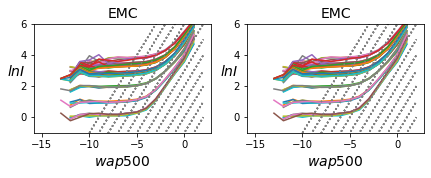

In [160]:
plt.figure(figsize=(7,2))
for hist_all_S in [hist_all_S_03, hist_all_S_36, hist_all_S_68, hist_all_S_810, hist_all_S_1012, hist_all_S_1214]:
    hist_all_S = hist_all_S.isel(S=0, drop=True)
    ax1 = plt.subplot(121)
    ax1.plot(hist_all_S.logwap_minusb,np.log(hist_all_S.pr_q_logwap_minus),'-')

    ax2 = plt.subplot(122)
    ax2.plot(hist_all_S.logwap_minusb,np.log(hist_all_S.pr_q_logwap_minus_M),'-')

    for ax in [ax1, ax2]:
        for iim in np.arange(-5,10,1):
            ax.plot(np.array([-10,2]),iim+1*np.array([-10,2]),':', color='grey')
        ax.set_title('EMC', fontsize=14)
        ax.set_ylim((-1,6))
    #     ax.set_xlim((284,305))
        # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
        ax.set_xlabel(r'$wap 500$', fontsize=14)
        ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)


In [1]:
plt.plot(sub_all.cape.values, sub_all.wap_500.values,'.')

NameError: name 'plt' is not defined

/local/ERAin/lib/python3.6/site-packages/xarray/core/computation.py:603: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


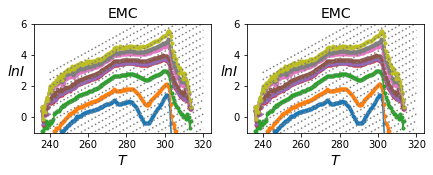

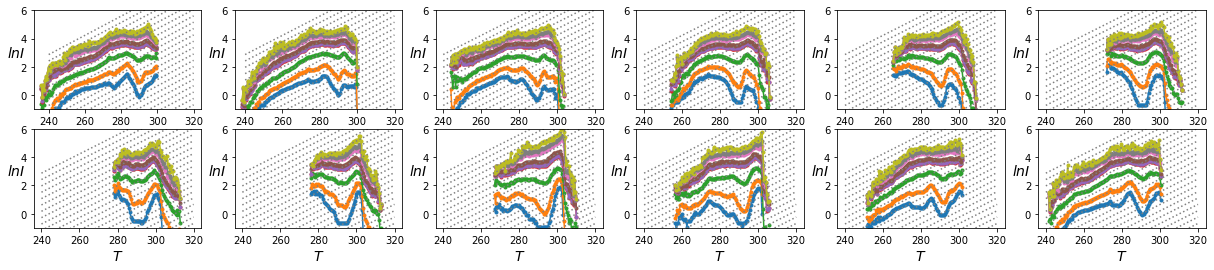

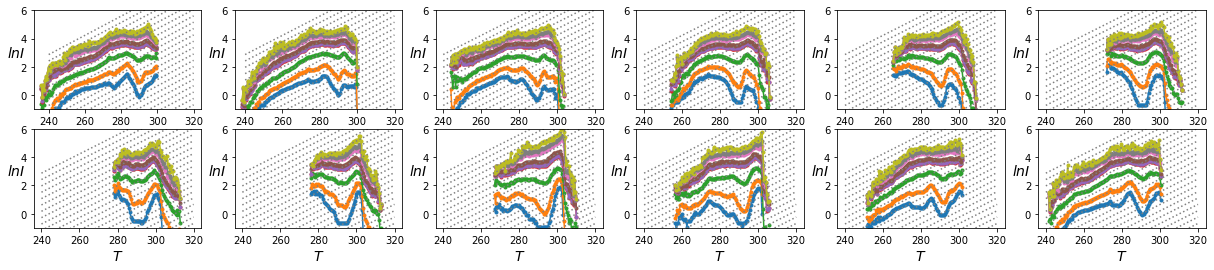

In [59]:
    
    
plt.figure(figsize=(21,4))
for iS in np.arange(1, 13):
    axx = plt.subplot(2,6,iS)
    plt.plot(hist_monthly_S_ls[iS-1].tas_2mb,np.log(hist_monthly_S_ls[iS-1].pr_q_tas_2m),'.-')
    for iim in np.arange(-31,-13,0.45):
        axx.plot(np.array([240,320]),iim+0.068*np.array([240,320]),':', color='grey')
#     ax.set_title('EMC', fontsize=14)
    axx.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    axx.set_xlabel(r'$T$', fontsize=14)
    axx.set_ylabel(r'$lnI$', rotation=0, fontsize=14)
    
plt.figure(figsize=(21,4))
for iS in np.arange(1, 13):
    axx = plt.subplot(2,6,iS)
    plt.plot(hist_monthly_S_ls[iS-1].tas_2mb,np.log(hist_monthly_S_ls[iS-1].pr_q_tas_2m_M),'.-')
    for iim in np.arange(-31,-13,0.45):
        axx.plot(np.array([240,320]),iim+0.068*np.array([240,320]),':', color='grey')
#     ax.set_title('EMC', fontsize=14)
    axx.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    axx.set_xlabel(r'$T$', fontsize=14)
    axx.set_ylabel(r'$lnI$', rotation=0, fontsize=14)

    

    

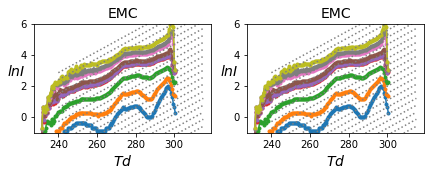

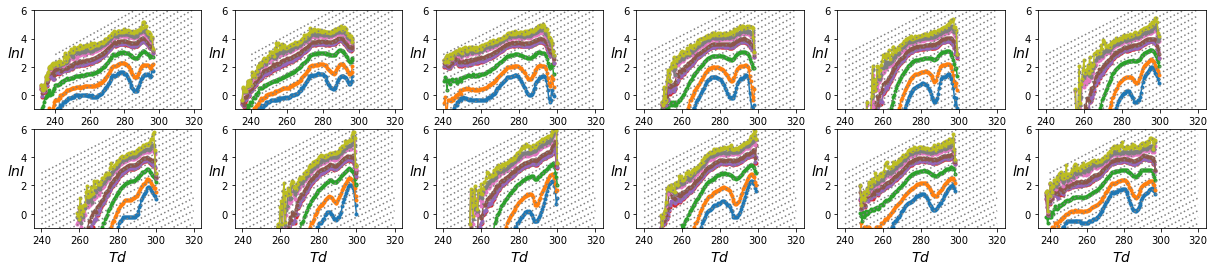

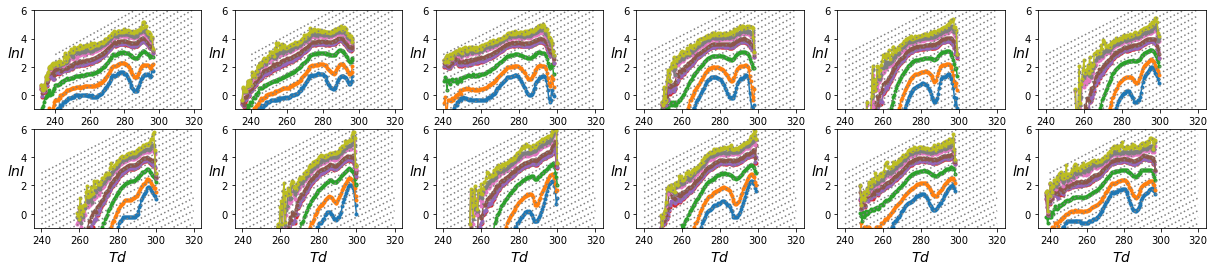

In [60]:
plt.figure(figsize=(7,2))
ax1 = plt.subplot(121)
plt.plot(hist_all_S.tdps_2mb,np.log(hist_all_S.pr_q_tdps_2m),'.-')
ax2 = plt.subplot(122)
plt.plot(hist_all_S.tdps_2mb,np.log(hist_all_S.pr_q_tdps_2m_M),'.-')
for ax in [ax1, ax2]:
    for iim in np.arange(-31,-13,0.45):
        ax.plot(np.array([240,315]),iim+0.068*np.array([240,315]),':', color='grey')
    ax.set_title('EMC', fontsize=14)
    ax.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    ax.set_xlabel(r'$Td$', fontsize=14)
    ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)
    
    
plt.figure(figsize=(21,4))
for iS in np.arange(1, 13):
    axx = plt.subplot(2,6,iS)
    plt.plot(hist_monthly_S_ls[iS-1].tdps_2mb,np.log(hist_monthly_S_ls[iS-1].pr_q_tdps_2m),'.-')
    for iim in np.arange(-31,-13,0.45):
        axx.plot(np.array([240,320]),iim+0.068*np.array([240,320]),':', color='grey')
#     ax.set_title('EMC', fontsize=14)
    axx.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    axx.set_xlabel(r'$Td$', fontsize=14)
    axx.set_ylabel(r'$lnI$', rotation=0, fontsize=14)
    
plt.figure(figsize=(21,4))
for iS in np.arange(1, 13):
    axx = plt.subplot(2,6,iS)
    plt.plot(hist_monthly_S_ls[iS-1].tdps_2mb,np.log(hist_monthly_S_ls[iS-1].pr_q_tdps_2m_M),'.-')
    for iim in np.arange(-31,-13,0.45):
        axx.plot(np.array([240,320]),iim+0.068*np.array([240,320]),':', color='grey')
#     ax.set_title('EMC', fontsize=14)
    axx.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    axx.set_xlabel(r'$Td$', fontsize=14)
    axx.set_ylabel(r'$lnI$', rotation=0, fontsize=14)

    

    


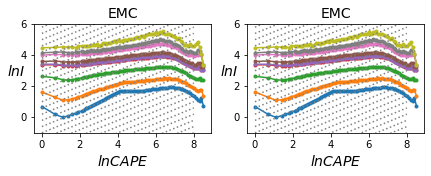

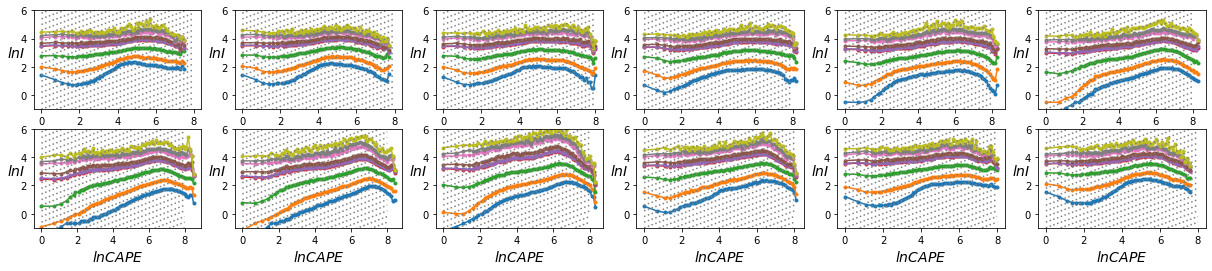

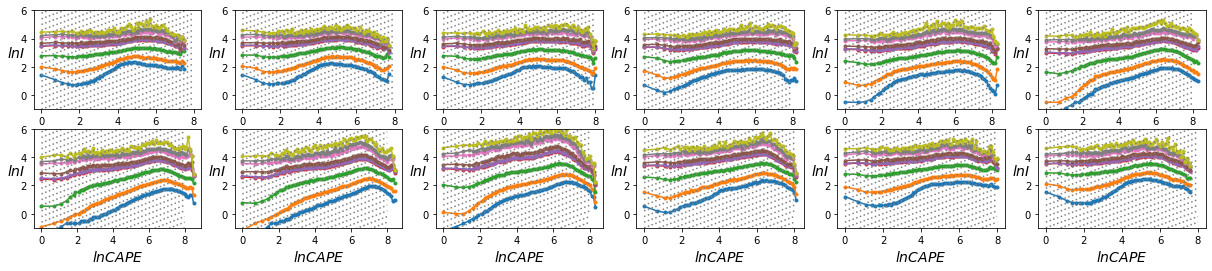

In [61]:
plt.figure(figsize=(7,2))
ax1 = plt.subplot(121)
plt.plot(hist_all_S.logcapeb,np.log(hist_all_S.pr_q_logcape),'.-')
ax2 = plt.subplot(122)
plt.plot(hist_all_S.logcapeb,np.log(hist_all_S.pr_q_logcape_M),'.-')
for ax in [ax1, ax2]:
    for iim in np.arange(-5,6,0.4):
        ax.plot(np.array([0,8]),iim+0.5*np.array([0,8]),':', color='grey')
    ax.set_title('EMC', fontsize=14)
    ax.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    ax.set_xlabel(r'$lnCAPE$', fontsize=14)
    ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)
    
    
plt.figure(figsize=(21,4))
for iS in np.arange(1, 13):
    axx = plt.subplot(2,6,iS)
    plt.plot(hist_monthly_S_ls[iS-1].logcapeb,np.log(hist_monthly_S_ls[iS-1].pr_q_logcape),'.-')
    for iim in np.arange(-5,6,0.4):
        axx.plot(np.array([0,8]),iim+0.5*np.array([0,8]),':', color='grey')
#     ax.set_title('EMC', fontsize=14)
    axx.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    axx.set_xlabel(r'$lnCAPE$', fontsize=14)
    axx.set_ylabel(r'$lnI$', rotation=0, fontsize=14)
    
plt.figure(figsize=(21,4))
for iS in np.arange(1, 13):
    axx = plt.subplot(2,6,iS)
    plt.plot(hist_monthly_S_ls[iS-1].logcapeb,np.log(hist_monthly_S_ls[iS-1].pr_q_logcape_M),'.-')
    for iim in np.arange(-5,6,0.4):
        axx.plot(np.array([0,8]),iim+0.5*np.array([0,8]),':', color='grey')
    #     ax.set_title('EMC', fontsize=14)
    axx.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    axx.set_xlabel(r'$lnCAPE$', fontsize=14)
    axx.set_ylabel(r'$lnI$', rotation=0, fontsize=14)

    

    


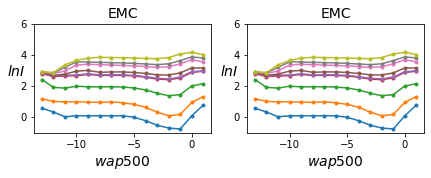

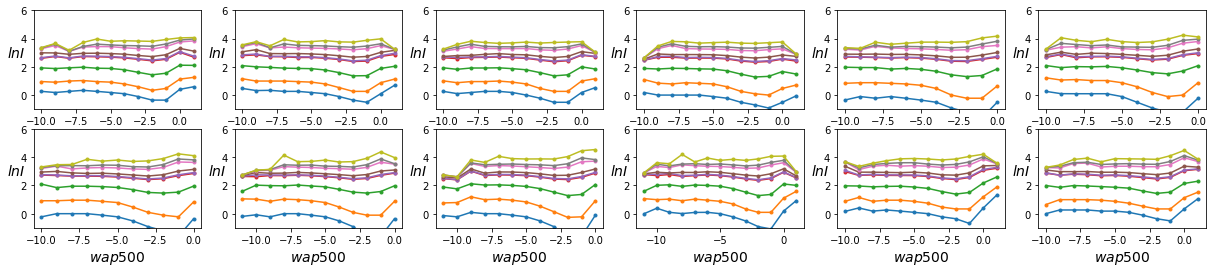

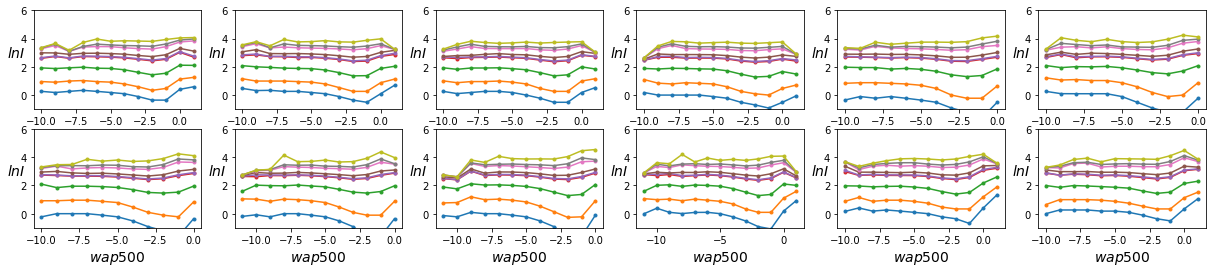

In [133]:
plt.figure(figsize=(7,2))
ax1 = plt.subplot(121)
ax1.plot(hist_all_S.logwap_plusb,np.log(hist_all_S.pr_q_logwap_plus),'.-')

ax2 = plt.subplot(122)
ax2.plot(hist_all_S.logwap_plusb,np.log(hist_all_S.pr_q_logwap_plus_M),'.-')

for ax in [ax1, ax2]:
#     for iim in np.arange(-5,6,0.2):
#         ax.plot((np.array([0,2]),iim+1*(np.array([0,2]))),':', color='grey')
    ax.set_title('EMC', fontsize=14)
    ax.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    ax.set_xlabel(r'$wap 500$', fontsize=14)
    ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)

    
    
plt.figure(figsize=(21,4))
for iS in np.arange(1, 13):
    axx = plt.subplot(2,6,iS)
    plt.plot(hist_monthly_S_ls[iS-1].logwap_plusb,np.log(hist_monthly_S_ls[iS-1].pr_q_logwap_plus),'.-')
#     for iim in np.arange(-5,6,0.4):
#         axx.plot(np.array([0,8]),iim+1*np.array([0,8]),':', color='grey')
#     ax.set_title('EMC', fontsize=14)
    axx.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    axx.set_xlabel(r'$wap 500$', fontsize=14)
    axx.set_ylabel(r'$lnI$', rotation=0, fontsize=14)
    
plt.figure(figsize=(21,4))
for iS in np.arange(1, 13):
    axx = plt.subplot(2,6,iS)
    plt.plot(hist_monthly_S_ls[iS-1].logwap_plusb,np.log(hist_monthly_S_ls[iS-1].pr_q_logwap_plus_M),'.-')
#     for iim in np.arange(-5,6,0.4):
#         axx.plot(np.array([0,8]),iim+1*np.array([0,8]),':', color='grey')
    #     ax.set_title('EMC', fontsize=14)
    axx.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    axx.set_xlabel(r'$wap 500$', fontsize=14)
    axx.set_ylabel(r'$lnI$', rotation=0, fontsize=14)
    

    


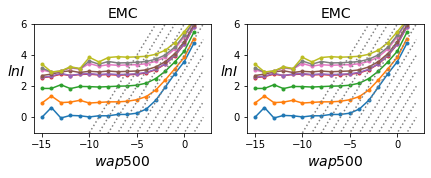

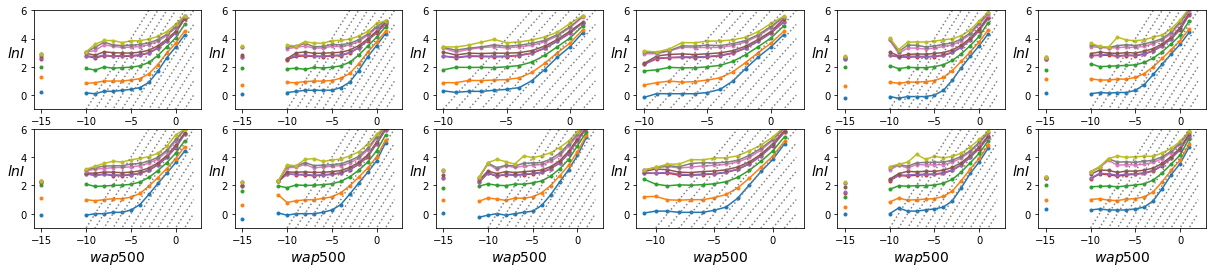

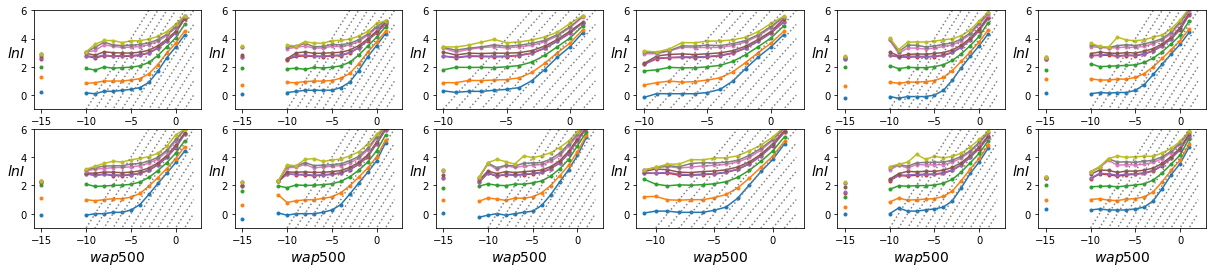

In [138]:
plt.figure(figsize=(7,2))
ax1 = plt.subplot(121)
ax1.plot(hist_all_S.logwap_minusb,np.log(hist_all_S.pr_q_logwap_minus),'.-')

ax2 = plt.subplot(122)
ax2.plot(hist_all_S.logwap_minusb,np.log(hist_all_S.pr_q_logwap_minus_M),'.-')

for ax in [ax1, ax2]:
    for iim in np.arange(-5,10,1):
        ax.plot(np.array([-10,2]),iim+1*np.array([-10,2]),':', color='grey')
    ax.set_title('EMC', fontsize=14)
    ax.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    ax.set_xlabel(r'$wap 500$', fontsize=14)
    ax.set_ylabel(r'$lnI$', rotation=0, fontsize=14)

    
    
plt.figure(figsize=(21,4))
for iS in np.arange(1, 13):
    axx = plt.subplot(2,6,iS)
    plt.plot(hist_monthly_S_ls[iS-1].logwap_minusb,np.log(hist_monthly_S_ls[iS-1].pr_q_logwap_minus),'.-')
    for iim in np.arange(-5,10,1):
        axx.plot(np.array([-10,2]),iim+1*np.array([-10,2]),':', color='grey')
#     ax.set_title('EMC', fontsize=14)
    axx.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    axx.set_xlabel(r'$wap 500$', fontsize=14)
    axx.set_ylabel(r'$lnI$', rotation=0, fontsize=14)
    
plt.figure(figsize=(21,4))
for iS in np.arange(1, 13):
    axx = plt.subplot(2,6,iS)
    plt.plot(hist_monthly_S_ls[iS-1].logwap_minusb,np.log(hist_monthly_S_ls[iS-1].pr_q_logwap_minus_M),'.-')
    for iim in np.arange(-5,10,1):
        axx.plot(np.array([-10,2]),iim+1*np.array([-10,2]),':', color='grey')
    #     ax.set_title('EMC', fontsize=14)
    axx.set_ylim((-1,6))
#     ax.set_xlim((284,305))
    # plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
    axx.set_xlabel(r'$wap 500$', fontsize=14)
    axx.set_ylabel(r'$lnI$', rotation=0, fontsize=14)
    

    


# NARR data

In [ ]:
narr_ds = xr.open_mfdataset('/crunch/c0/NARR/3_hr_all/cape_ml/*.nc')

/local/ERAin/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'cape_ml' has multiple fill values {9.969209968386869e+36, -9.96921e+36}, decoding all values to NaN.
  use_cftime=use_cftime,
/local/ERAin/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'cape_ml' has multiple fill values {9.969209968386869e+36, -9.96921e+36}, decoding all values to NaN.
  use_cftime=use_cftime,
/local/ERAin/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'cape_ml' has multiple fill values {9.969209968386869e+36, -9.96921e+36}, decoding all values to NaN.
  use_cftime=use_cftime,
/local/ERAin/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'cape_ml' has multiple fill values {9.969209968386869e+36, -9.96921e+36}, decoding all values to NaN.
  use_cftime=use_cftime,
/local/ERAin/lib/python3.6/site-packages/xarray/conventions.py:494: SerializationWarning: variab

In [ ]:
narr_ds = narr_ds[0:900]

In [ ]:

ds_out =sub_all[['lat','lon']]

In [ ]:
ds_out

In [ ]:
import xesmf as xe


In [ ]:
regridder = xe.Regridder(narr_ds, ds_out, 'bilinear')


In [ ]:
# narr_ds.swap_dims({'x':'lon','y':'lat'})

In [ ]:
dr_out = regridder(narr_ds)


In [ ]:
dr_out

In [ ]:
dr_out.cape_ml[0:900].load().mean('time').plot()